In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

# preprocessing

In [2]:
df = pd.read_csv("train (2).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
cols_to_drop = "PassengerId Name Ticket ".split()

In [5]:
df.drop(cols_to_drop ,axis=1 ,inplace=True)

### 2-Dtypes

In [6]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtypes":dtypes,"n_uniq":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_uniq,2,3,2,88,7,7,248,147,3


In [7]:
cat_cols = "Survived Pclass Sex SibSp Parch Cabin Embarked".split()

In [8]:
df[cat_cols] = df[cat_cols].astype("category")

In [9]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtypes":dtypes,"n_uniq":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,category,category,category,float64,category,category,float64,category,category
n_uniq,2,3,2,88,7,7,248,147,3


In [10]:
cols = df.columns.tolist()
cols.pop(0)
cols.append("Survived")
df = df[cols]

In [11]:
df.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.25,NaN,S,0


In [12]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"null":null,"null_ratio":null_ratio}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
null,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000,0.0
null_ratio,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245,0.0


In [13]:
df.drop(["Cabin"],axis=1 ,inplace=True)

In [14]:
df.dropna(subset=["Embarked"],inplace=True)

- **replace null values in age**
    - because it contains relativly high null values

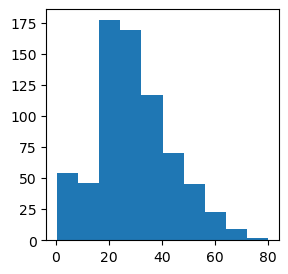

In [15]:
plt.figure(figsize=(3,3))
plt.hist(df.Age)
plt.show()

In [16]:
median = df.Age.median()
df.Age.replace(np.nan,median,inplace=True)
#df.Age.fillna(median, inplace=True)

In [17]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"null":null,"null_ratio":null_ratio}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# check for outliers

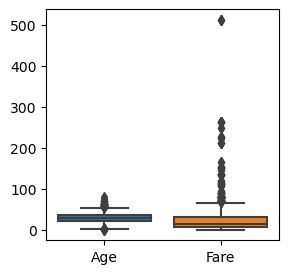

In [18]:
plt.figure(figsize=(3,3))
sns.boxplot(df);

In [19]:
num_cols = df.select_dtypes("number").columns

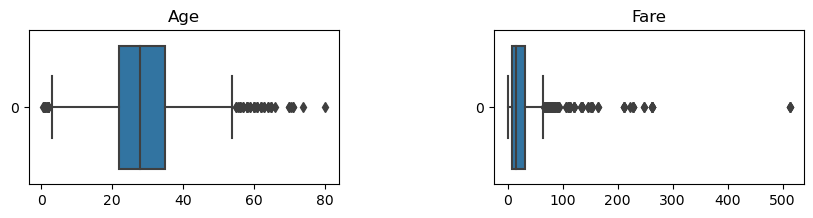

In [20]:
plt.figure(figsize=(10,2))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(col)
    sns.boxplot(df[col],orient="h")
plt.subplots_adjust(hspace=.5 , wspace=.5)
plt.show()

In [21]:
Q1 = df["Age"].quantile(.25)
Q3 = df["Age"].quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
upper_out = df[df["Age"] > upper]["Age"].values
lower_out = df[df["Age"] < lower]["Age"].values
df["Age"].replace(upper_out , upper ,inplace=True)
df["Age"].replace(lower_out , lower ,inplace=True)

In [22]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_out = df[df[col] > upper][col].values
    lower_out = df[df[col] < lower][col].values
    df[col].replace(upper_out , upper ,inplace=True)
    df[col].replace(lower_out , lower ,inplace=True)

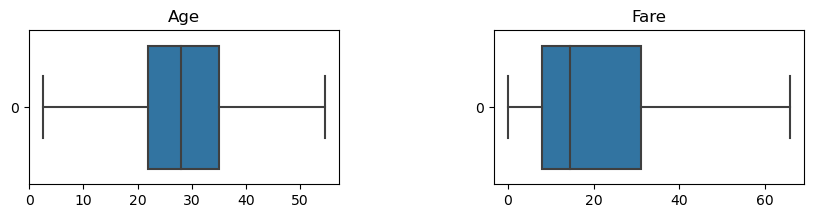

In [23]:
plt.figure(figsize=(10,2))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(col)
    sns.boxplot(df[col],orient="h")
plt.subplots_adjust(hspace=.5 , wspace=.5)
plt.show()

In [24]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

129
0


In [25]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x_train.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x_train[num_cols])

x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [27]:
dtypes = x.dtypes
n_uniq = x.nunique()
pd.DataFrame({"dtypes":dtypes,"n_uniq":n_uniq}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
dtypes,category,category,float64,category,category,float64,category
n_uniq,3,2,65,7,7,204,3


In [28]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder(cols=["Sex","Embarked"])
enc.fit(x_train)

x_train = enc.transform(x_train)
x_test = enc.transform(x_test)

In [38]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters
 
"""""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
"""""
 #using softmax for multi classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def forward_propagation(X, parameters):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    
    Z1 = np.dot(X, W1) + b1
    A1 = softmax(Z1)
    
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost_nn(A2, Y):
    m = Y.shape[0]
   # epsilon = 1e-5
    cost = (-1 / m) * np.sum(Y * np.log(A2)) # removing the epsilon bec. the softmax function dosn't need it
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[0]
    A1, A2 = cache["A1"], cache["A2"]
    W2 = parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(A1.T, dZ2)
    db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(A1, 2)) #dervative of tanh to work with calssification
    dW1 = 1 / m * np.dot(X.T, dZ1)
    db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    dW1, db1, dW2, db2 = gradients["dW1"], gradients["db1"], gradients["dW2"], gradients["db2"]
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def predict_nn(X, parameters, threshold=0.5):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 >= threshold).astype(int)
    return predictions


In [39]:
y_train_arr = y_train.values if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
y_test_arr = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test
# Define neural network parameters
input_size = x_train.shape[1]
hidden_size = 4
output_size = 1
parameters_nn = initialize_parameters(input_size, hidden_size, output_size)

# Train the neural network using gradient descent
alpha_nn = 0.01
num_iterations_nn = 1000
for i in range(num_iterations_nn):
    A2, cache = forward_propagation(x_train, parameters_nn)
    cost = compute_cost_nn(A2, y_train_arr)
    gradients = backward_propagation(parameters_nn, cache, x_train, y_train_arr)
    parameters_nn = update_parameters(parameters_nn, gradients, alpha_nn)

# Make predictions
y_pred_train_nn = predict_nn(x_train, parameters_nn)
y_pred_test_nn = predict_nn(x_test, parameters_nn)



# Evaluate performance
accuracy_train_nn = np.mean(y_pred_train_nn == y_train_arr.reshape(-1, 1)) * 100
accuracy_test_nn = np.mean(y_pred_test_nn == y_test_arr.reshape(-1, 1)) * 100
print(f"Neural Network Training Accuracy: {accuracy_train_nn:.2f}%")
print(f"Neural Network Testing Accuracy: {accuracy_test_nn:.2f}%")


Neural Network Training Accuracy: 39.31%
Neural Network Testing Accuracy: 47.37%
